# RQ1
https://docs.google.com/document/d/1a_6lp-0RcdGTYWP4wBq3WuaPgDrjyvGIfMbyZjm9Z_U/edit?usp=sharing


In [1]:
# imports
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import platform


In [2]:
# suppress annoying warnings
pd.options.mode.chained_assignment = None

In [3]:
# change current working directory to content root
if platform.system() == 'Windows':
    os.chdir('..\\..')
    # check that this worked out
    assert os.getcwd().split('\\')[-1] == 'immun-ml'
else:
    os.chdir('../..')
    # check that this worked out
    assert os.getcwd().split('/')[-1] == 'immun-ml'

In [4]:
# read in dataset
johannes_path = '/Users/johannesallgaier/Library/CloudStorage/GoogleDrive-johannes.allgaier@ikeb-wuerzburg.com/My Drive/23-12-06_Immun-ML/'
johannes_path_windows = 'G:/My Drive/23-12-06_Immun-ML/04_Data/00_raw/'
df = pd.read_excel(johannes_path_windows + '2024.02.26_Mastertable.xlsx')

## Target 1: `SARS-IgG`

In [5]:
sars_igg_columns = [col for col in df.columns if 'SARS-IgG' in col and not 'dicho' in col]
target_df = df[['ID'] + sars_igg_columns]
target_df.dropna(how='all', inplace=True)
target_df.set_index('ID',inplace=True)
target_df.loc[:,'non_null_count'] = target_df.notnull().sum(axis=1)
print('How many SARS-IgG values do we have per patient?')
target_df['non_null_count'].describe()

How many SARS-IgG values do we have per patient?


count    331.000000
mean       7.238671
std        5.051896
min        0.000000
25%        3.000000
50%        5.000000
75%       12.000000
max       17.000000
Name: non_null_count, dtype: float64

**The variable SARS-IgG seems to be very sparse with 6 measurements per patient +/- 6 values. Some patients do not have any measurements and one patient has 20 measurements.**

### Check Date Ranges for Entnahme_T{i}

In [6]:
date_cols = [col for col in df.columns if 'Entnahme' in col]

df[date_cols].describe().loc[['min', 'max'], :]

,Entnahme_T0,Entnahme_T1,Entnahme_T2,Entnahme_T3,Entnahme_T4,Entnahme_T12,Entnahme_T13,Entnahme_T14,Entnahme_T15,Entnahme_T16,...,Entnahme_T22,"Entnahme_T22,5",Entnahme_T23,Entnahme_T24,Entnahme_T25,Entnahme_Tb,Entnahme_T31e,Entnahme_T32,"Entnahme_T32,5",Entnahme_T33
min,2021-02-16 00:00:00,2021-03-02 00:00:00,2021-02-18 00:00:00,2021-04-26 00:00:00,2021-08-02 00:00:00,2021-10-25 00:00:00,2021-12-13 00:00:00,2022-02-22 00:00:00,2022-06-27 00:00:00,2022-10-03 00:00:00,...,2022-04-11 00:00:00,2022-12-13 00:00:00,2022-05-16 00:00:00,2022-08-08 00:00:00,2022-11-10 00:00:00,2022-10-24 00:00:00,2022-10-24 00:00:00,2022-11-09 00:00:00,2022-12-12 00:00:00,2023-01-10 00:00:00
max,2021-02-16 00:00:00,2021-07-29 00:00:00,2021-11-05 00:00:00,2021-12-21 00:00:00,2021-11-26 00:00:00,2022-02-14 00:00:00,2022-04-13 00:00:00,2022-06-23 00:00:00,2022-07-28 00:00:00,2022-12-22 00:00:00,...,2023-01-04 00:00:00,2023-01-09 00:00:00,2023-01-09 00:00:00,2022-11-10 00:00:00,2023-01-09 00:00:00,2022-11-04 00:00:00,2022-11-30 00:00:00,2022-12-22 00:00:00,2023-01-11 00:00:00,2023-02-09 00:00:00


### Check patient-wise for patient-pairs with 360 days time gap between two values
According to the codebook, this is T16 and T26. However, T26 is not in the dataset. We thus move on with T16.

In [9]:
cols_of_interest = ['Entnahme_T16',  '3._Impfung', '3._Impfung_DATUM']

In [10]:
df[cols_of_interest].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Entnahme_T16      36 non-null     datetime64[ns]
 1   3._Impfung        180 non-null    float64       
 2   3._Impfung_DATUM  152 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(1)
memory usage: 8.0 KB


**This is too little data to continue.**

### Find specific dates of target values instead of T1, T2, ...

In [9]:

time_points = [date_col.split('_')[-1] for date_col in date_cols]
sub_df = df[['ID'] + date_cols + sars_igg_columns]

sub_df.columns

Index(['ID', 'Entnahme_T0', 'Entnahme_T1', 'Entnahme_T2', 'Entnahme_T3',
       'Entnahme_T4', 'Entnahme_T12', 'Entnahme_T13', 'Entnahme_T14',
       'Entnahme_T15', 'Entnahme_Z16', 'Entnahme_T17', 'Entnahme_T20',
       'Entnahme_T21e', 'Entnahme_T22', 'Entnahme_T22,5', 'Entnahme_T23',
       'Entnahme_T24', 'Entnahme_T25', 'Entnahme_Tb', 'Entnahme_T31e',
       'Entnahme_T32', 'Entnahme_T32,5', 'Entnahme_T33', 'SARS-IgG_T0',
       'SARS-IgG_T1', 'SARS-IgG_T2', 'SARS-IgG_T3', 'SARS-IgG_T4',
       'SARS-IgG_T12', 'SARS-IgG_T13', 'SARS-IgG_T14', 'SARS-IgG_T15',
       'SARS-IgG_T16', 'SARS-IgG_T17', 'SARS-IgG_T18', 'SARS-IgG_T20',
       'SARS-IgG_T21e', 'SARS-IgG_T22', 'SARS-IgG_T23', 'SARS-IgG_T24',
       'SARS-IgG_T25', 'SARS-IgG_T26', 'SARS-IgG_Tb', 'SARS-IgG_T31e',
       'SARS-IgG_T32', 'SARS-IgG_T32,5', 'SARS-IgG_T33', 'SARS-IgG_T34'],
      dtype='object')

In [7]:
sars_melted = pd.melt(df, id_vars='ID', value_vars=[f'SARS-IgG_{i}' for i in time_points if i != 'T22,5'],
                      var_name='SARS-IgG', value_name='SARS-IgG_Value')

In [8]:
sars_melted['Date'] = None

for idx in sars_melted.index:
    ID = sars_melted.loc[idx, 'ID']
    Time = sars_melted.loc[idx, 'SARS-IgG'].split('_')[-1]
    try:
        sars_melted.loc[idx, 'Date'] = df[df['ID']==ID][f'Entnahme_{Time}'].iloc[0]
    except:
        print(f'Error for ID {ID} and Time {Time}')


In [11]:
sars_melted.sort_values(by=['ID','Date'])

,ID,SARS-IgG,SARS-IgG_Value,Date
123,C1,SARS-IgG_T0,6.30,2021-02-16 00:00:00
451,C1,SARS-IgG_T1,18.27,2021-03-04 00:00:00
779,C1,SARS-IgG_T2,247.59,2021-04-06 00:00:00
1107,C1,SARS-IgG_T3,91.35,2021-06-10 00:00:00
1435,C1,SARS-IgG_T4,52.08,2021-09-14 00:00:00
...,...,...,...,...
5336,HD99,SARS-IgG_T25,NaN,NaN
5664,HD99,SARS-IgG_Tb,NaN,NaN
5992,HD99,SARS-IgG_T31e,NaN,NaN
6320,HD99,SARS-IgG_T32,NaN,NaN


In [6]:
target_df = target_df.sort_values(by='non_null_count', ascending=False)

<Figure size 1500x500 with 0 Axes>

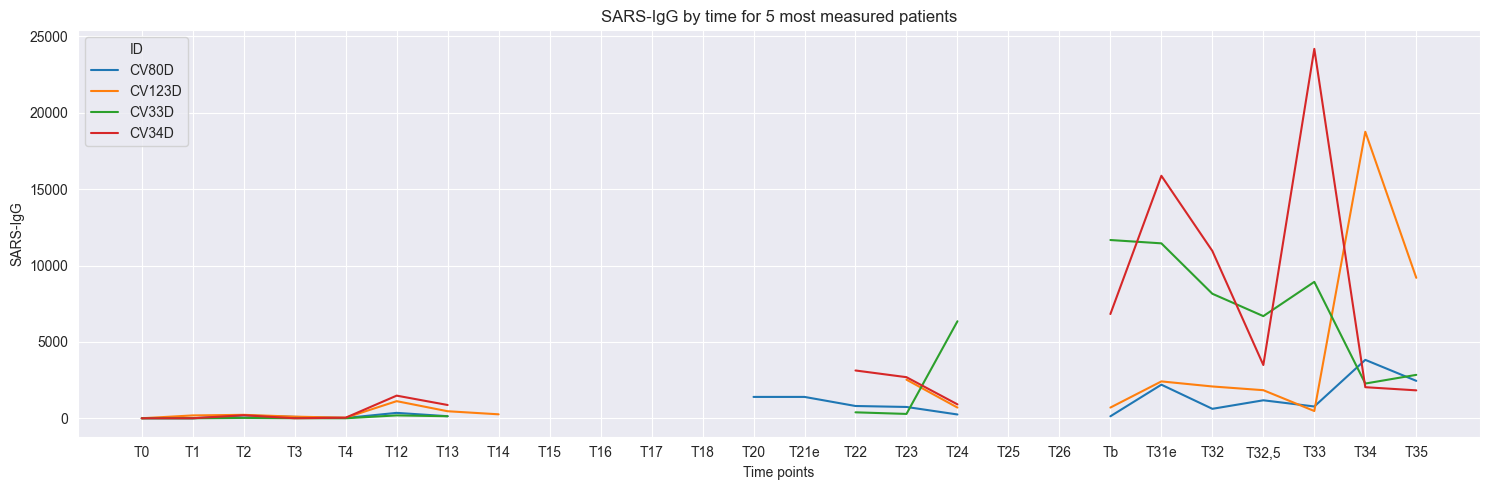

In [7]:
plt.figure(figsize=(15, 5))

sub_df=target_df.iloc[:5, :-1].T

ax = sub_df.plot(kind='line', figsize=(15,5))

# set xtick labels
plt.xticks(range(len(sub_df.index)), [idx.split('_')[-1] for idx in sub_df.index])

# Adding title and labels
plt.title('SARS-IgG by time for 5 most measured patients')
plt.xlabel('Time points')  # Replace 'X-axis Label' with your actual x-axis label
plt.ylabel('SARS-IgG')  # Replace 'Y-axis Label' with your actual y-axis label # Replace 'Legend Title' with your actual legend title

# layout
plt.tight_layout()

# Show the plot
plt.show()


Text(0.5, 1.0, 'SARS-IgG distribution by time points')

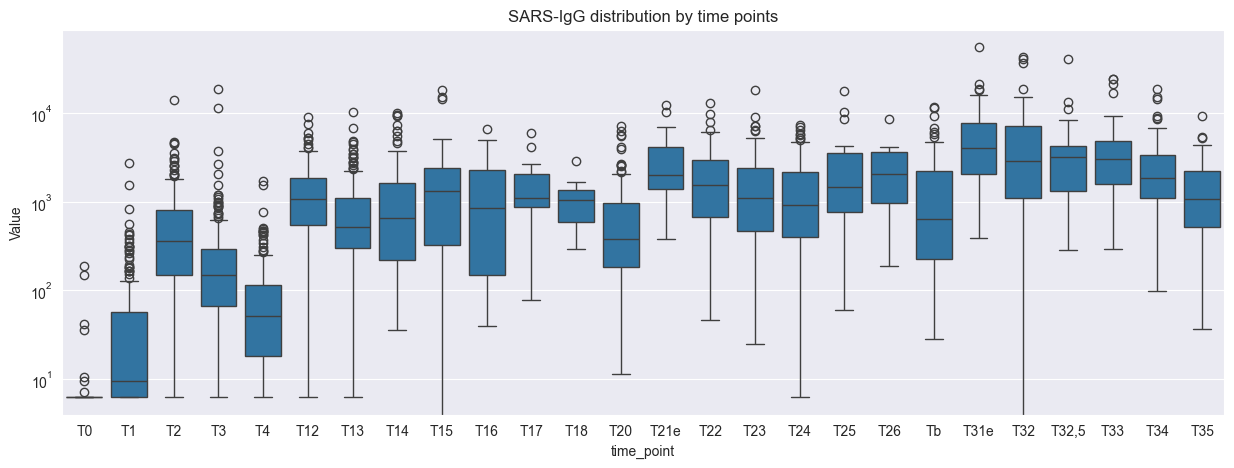

In [16]:
sub_df = target_df.iloc[:, :-1]

sub_df.rename(columns={col: col.split('_')[-1] for col in sub_df.columns}, inplace=True)

plt.figure(figsize=(15, 5))

target_df_melted = pd.melt(sub_df, var_name='time_point', value_name='Value')
# Convert to numeric, coerce errors to NaN
target_df_melted['Value'] = pd.to_numeric(target_df_melted['Value'], errors='coerce')

# Drop rows with NaN in the 'Value' column
target_df_melted = target_df_melted.dropna(subset=['Value'])

# Cast the 'Value' column to integers
target_df_melted['Value'] = target_df_melted['Value'].astype(float)

g = sns.boxplot(data=target_df_melted, x = 'time_point', y ='Value')
g.set_yscale("log")

plt.title('SARS-IgG distribution by time points')

### Problem: `SARS_IgG_12m`, der Target, exisitiert so nicht im Datensatz.

## Target 2: `SARS_RAI_12m`

In [ ]:
# TODO mit Eric klären, Targets nicht im Datensatz